## Churn Analysis Project
### Team 5

In [82]:
# import necessary models
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing functions
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

# models and evaluation functions
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, ConfusionMatrixDisplay, make_scorer

# A. Read and display files

### i. Customer Churn Demographics

In [83]:
# read data with pandas into a dataframe
demographics_df = pd.read_csv("Telco_customer_churn_demographics.csv")
# print data shape and first 5 rows
print(demographics_df.shape)
demographics_df.head()

(7043, 10)


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1


### ii. Customer Churn Location

In [84]:
# read data with pandas into a dataframe
location_df = pd.read_csv("Telco_customer_churn_location.csv")
# print data shape and first 5 rows
print(location_df.shape)
location_df.head()

(7043, 10)


,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


### iii. Customer Churn Population

In [85]:
# read data with pandas into a dataframe
population_df = pd.read_csv("Telco_customer_churn_population.csv")
# print data shape and first 5 rows
print(population_df.shape)
population_df.head()

(1671, 3)


,ID,Zip Code,Population
0,1,90001,"54,492"
1,2,90002,"44,586"
2,3,90003,"58,198"
3,4,90004,"67,852"
4,5,90005,"43,019"


### iv. Customer Churn Services

In [86]:
# read data with pandas into a dataframe
services_df = pd.read_csv("Telco_customer_churn_services.csv")
# print data shape and first 5 rows
print(services_df.shape)
services_df.head()

(7043, 31)


,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


### v. Customer Churn Status

In [87]:
# read data with pandas into a dataframe
status_df = pd.read_csv("Telco_customer_churn_status.csv")
# print data shape and first 5 rows
print(status_df.shape)
status_df.head()

(7043, 12)


,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


# B. Explore Data

In [88]:
# visualize target balance
balance = status_df["Churn Value"].value_counts(normalize=True)
balance

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Problem is clearly imbalanced. Around 73% of people didn't churn and 27% did churn

In [89]:
# View most common churn reasons
status_df["Churn Category"].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

### Visualize correlations between features of each dataframe and the target feature.
### This will guide us on which features to select from the available dataframes for prediction. 

In [90]:
# define encoding function
def encode_categorical_columns(df):
    """Encodes categorical columns in a DataFrame with numerical labels."""
    encoders = {}
    df_encoded = df.copy()
    
    for col in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        encoders[col] = le
    
    return df_encoded

In [91]:
# minimum correlation value
r = 2 / len(status_df)**0.5
r

0.023831487540255887

- In general, we'll consider features that have a correlation value with the target greater than 0.02

### 1. Demographics

In [92]:
# drop unnecessary columns
clean_demog = demographics_df.drop(columns=["Count", "Customer ID"])
# encode categorical features
clean_demog = encode_categorical_columns(clean_demog)
clean_demog.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value
0,1,78,0,1,0,0,0,1
1,0,74,0,1,1,1,1,1
2,1,71,0,1,0,1,3,1
3,0,78,0,1,1,1,1,1
4,0,80,0,1,1,1,1,1


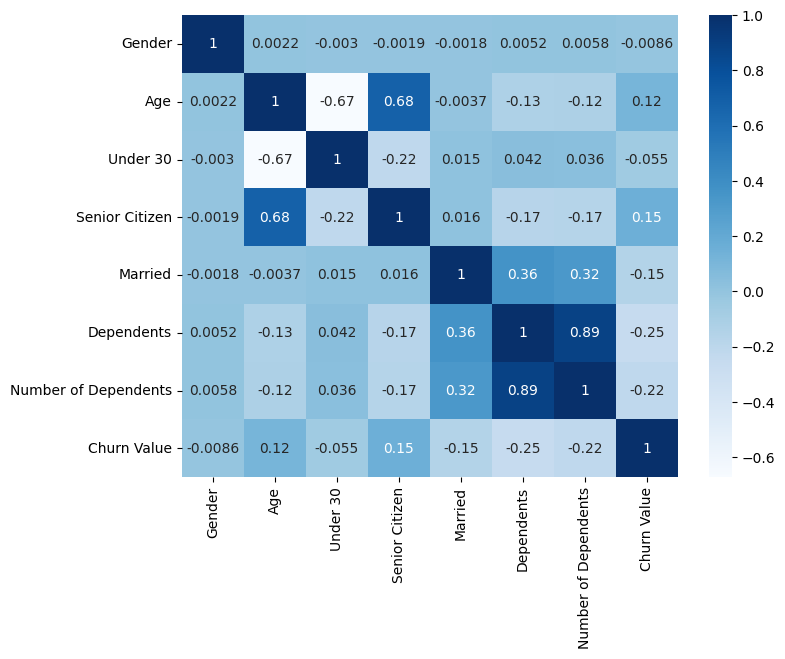

In [93]:
# calculate correlation matrix and display heatmap using seaborn
corr = clean_demog.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

- Gender has a correlation less than our threshold (0.02), so we'll drop it.
- Age, Under 30 and Senior Citizen have quite high correlations between each other, so we'll probably keep just one.
- Dependents and Number of Dependents have a high correlation between each other, so we'll keep 'Dependents' only.

**Keep:** Married, Dependents, Senior Citizen. (Might group Ages in bins and use)

### 2. Location

In [94]:
y = status_df["Churn Value"] # save taerget feature in variable y
# append target feature to location dataframe
location_df["target"] = y
# Drop features that are irrelavant or same for all customers
location_clean = location_df.drop(columns=["Location ID", "Customer ID", "Country", "State", "City", "Lat Long", "Count"])
location_clean.head()

,Zip Code,Latitude,Longitude,target
0,90022,34.023810,-118.156582,1
1,90063,34.044271,-118.185237,1
2,90065,34.108833,-118.229715,1
3,90303,33.936291,-118.332639,1
4,90602,33.972119,-118.020188,1


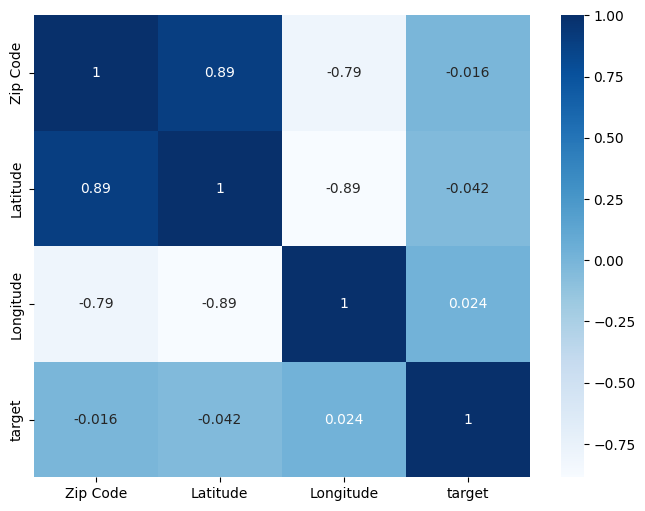

In [95]:
# calculate correlation matrix and display heatmap using seaborn
corr = location_clean.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

- Correlations are quite low, however, might keep Zip Codes for visualization purposes

### 3. Status

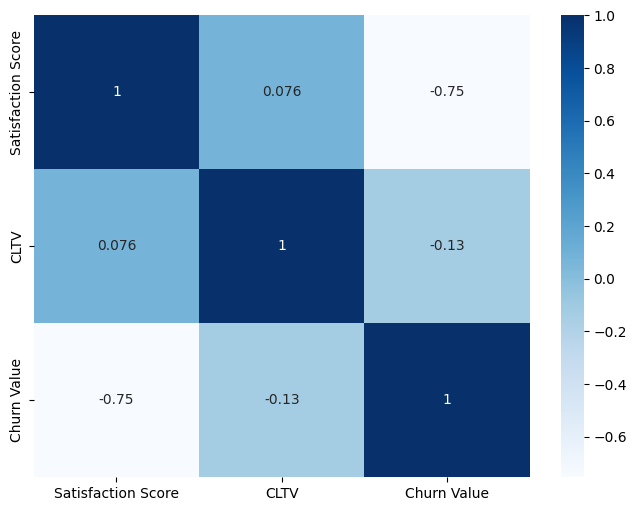

In [96]:
# keep relevant features only
status_clean = status_df[["Satisfaction Score", "CLTV", "Churn Value"]]

# calculate correlation matrix and display heatmap using seaborn
corr = status_clean.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

- Satisfaction score has a high correlation with the churn value. Determines largely if a cuctomer will churn or not.

**Can we identify what affects a customer's score?**

**Keep:** Satisfaction score, CLTV

### 4. Services

In [97]:
# Viaualize list of features in services column
services_df.columns

Index(['Service ID', 'Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [98]:
services_df["Churn Value"] = y
# drop obvious irrelevant features
services_clean = services_df.drop(columns=["Service ID", "Customer ID", "Count", "Quarter", "Avg Monthly Long Distance Charges"])
# encode features
services_clean = encode_categorical_columns(services_clean)

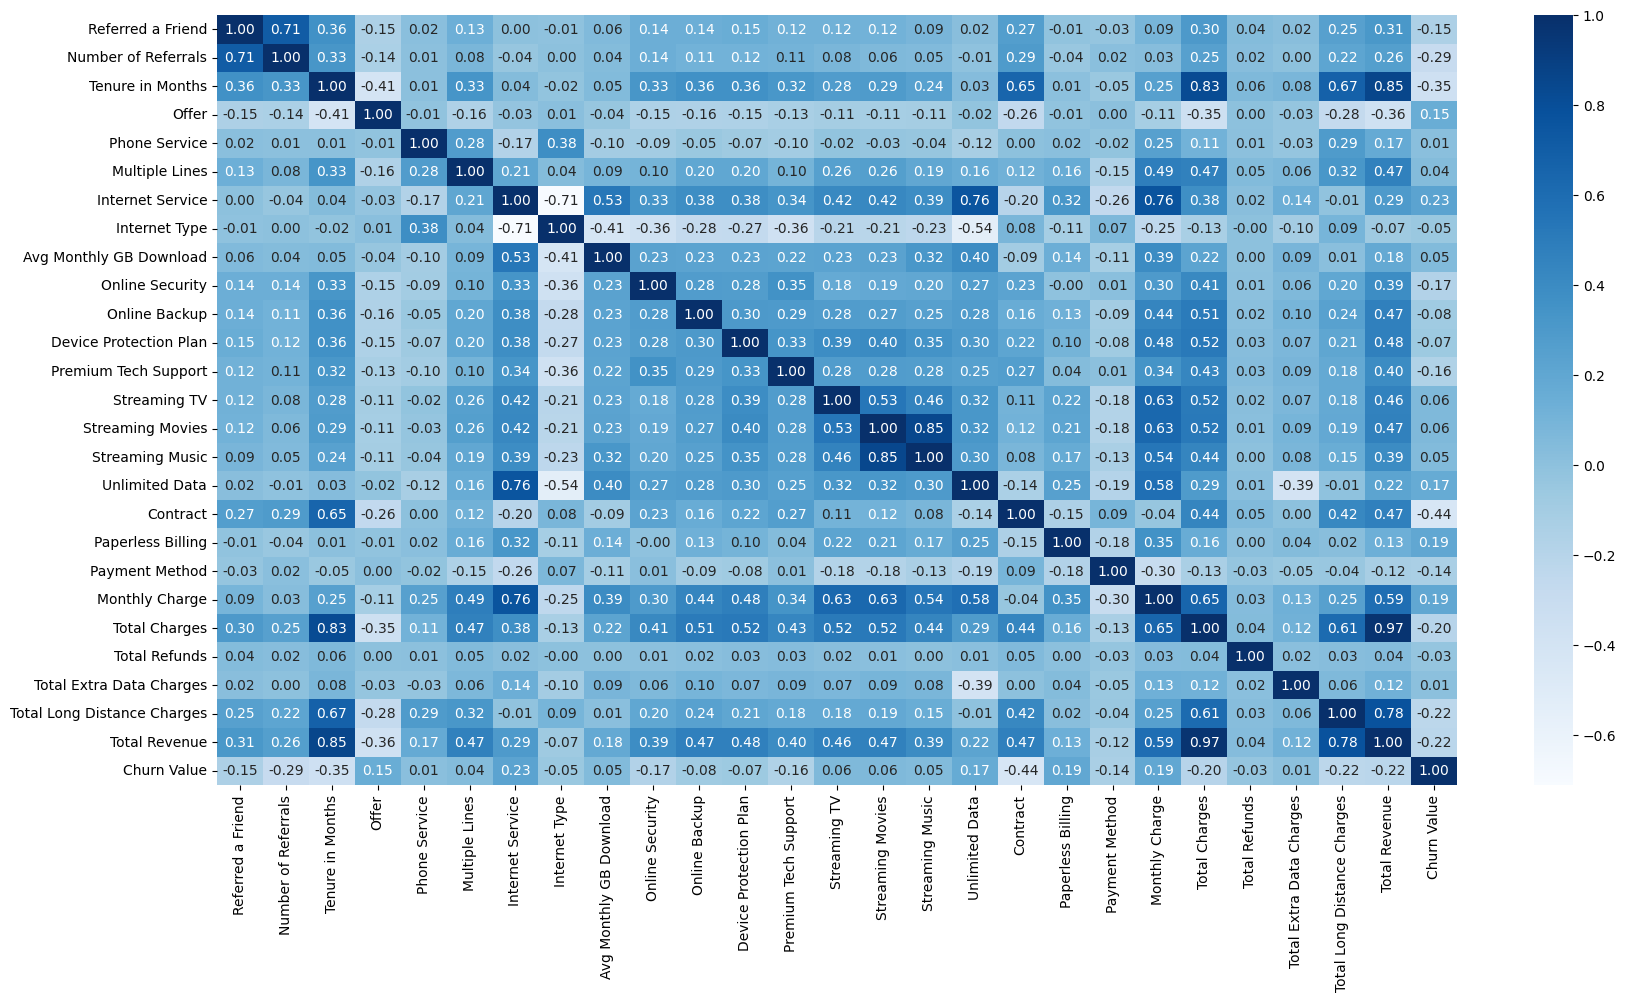

In [99]:
# calculate correlation matrix and display heatmap using seaborn
corr = services_clean.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.show()

In [100]:
# drop features with low correlations with target and derived features too.
services_clean1 = services_clean.drop(columns=["Referred a Friend", "Offer", "Phone Service", "Multiple Lines", "Internet Type",
                                              "Avg Monthly GB Download", "Online Backup", "Device Protection Plan",
                                              "Streaming Movies", "Streaming Music", "Total Charges", "Total Refunds",
                                              "Total Extra Data Charges", "Total Long Distance Charges", "Total Revenue"])

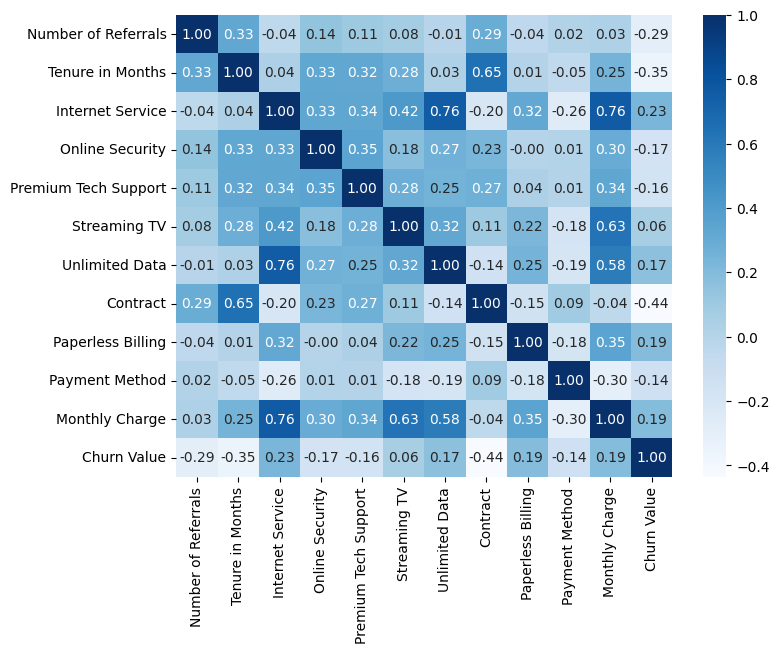

In [101]:
# recompute correlation matrix and display heatmap using seaborn
corr = services_clean1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.show()

### Form final dataframe using relevant features.

In [102]:
# get features from demographics
training_data = demographics_df[["Dependents", "Married", "Senior Citizen"]]
# get status features
training_data.loc[:, ["Satisfaction Score", "CLTV"]] = status_df[["Satisfaction Score", "CLTV"]]
# add services features
training_data = training_data.join(services_df[services_clean1.columns])
print(f"Data shape is: {training_data.shape}")
training_data.head()

Data shape is: (7043, 17)


,Dependents,Married,Senior Citizen,Satisfaction Score,CLTV,Number of Referrals,Tenure in Months,Internet Service,Online Security,Premium Tech Support,Streaming TV,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Churn Value
0,No,No,Yes,3,5433,0,1,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,1
1,Yes,Yes,Yes,3,5302,1,8,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,1
2,Yes,No,Yes,2,3179,0,18,Yes,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1
3,Yes,Yes,Yes,2,5337,1,25,Yes,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,1
4,Yes,Yes,Yes,2,2793,1,37,Yes,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,1


# C. Data Visualization

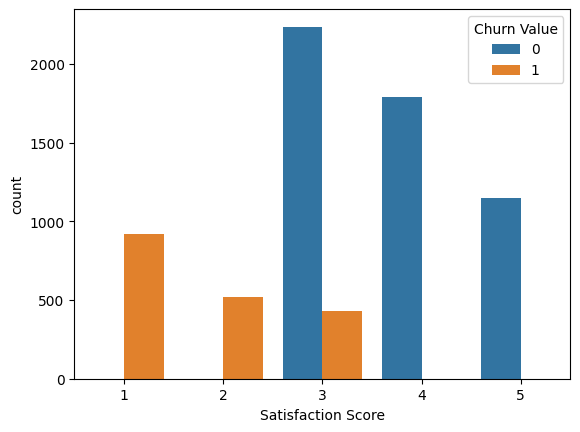

In [103]:
# visualize satisfaction scores
sns.countplot(data=training_data, x="Satisfaction Score", hue="Churn Value")
plt.show()

- looks like from customers satisfaction scores with the company we can tell if they'll stay with the company or not.
- Customers who rate with a low score (< 3) tend to leave the company while those with high scores stay.

**NB** : Can the data explain customer satisfaction scores?

In [104]:
# visualize customer value range
training_data["CLTV"].min(), training_data["CLTV"].max()

(np.int64(2003), np.int64(6500))

In [105]:
# categorize customer value. (Categries are not provided with the data. So this is an assumption)
def categorize_cltv(value):
    """Categorizes CLTV into ranges."""
    if value < 3000:
        return 'Low'
    elif value < 4000:
        return 'Medium'
    elif value < 5500:
        return 'High'
    else:
        return 'Very High'

training_data['CLTV_Category'] = training_data['CLTV'].apply(categorize_cltv)


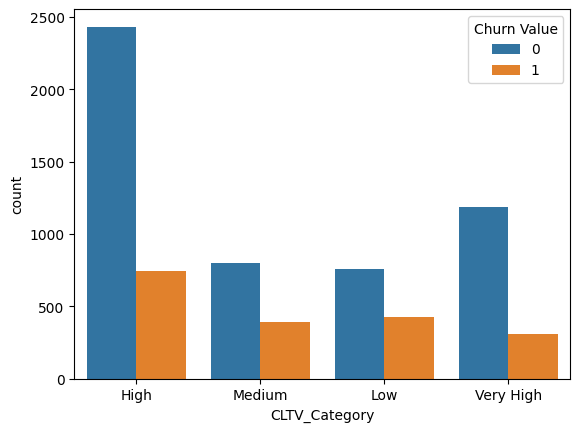

In [106]:
# visualize customer value categories
sns.countplot(data=training_data, x="CLTV_Category", hue="Churn Value")
plt.show()

- The company has many more high value customers, however, relative to other categories,  many of these customers end up leaving the company.
- About half of the medium and low categories left the company.

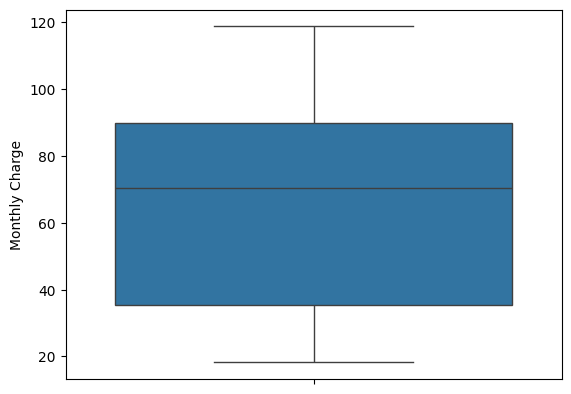

In [107]:
# check for outliers in Monthly Charge using boxplots
sns.boxplot(data=training_data, y="Monthly Charge")
plt.show()

### Based on the plot, we see there are no outliers

# D. Data Preprocessing and Transformation

In [108]:
# check if there are any missing values
training_data.isna().sum()

Dependents              0
Married                 0
Senior Citizen          0
Satisfaction Score      0
CLTV                    0
Number of Referrals     0
Tenure in Months        0
Internet Service        0
Online Security         0
Premium Tech Support    0
Streaming TV            0
Unlimited Data          0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charge          0
Churn Value             0
CLTV_Category           0
dtype: int64

In [109]:
# check if there are any duplicates
training_data.duplicated().sum()

np.int64(0)

- There are no missing values or duplicates

### Data Transformation

In [110]:
# separate features and target variable
y = training_data["Churn Value"]
X = training_data.drop(columns=["Churn Value", "CLTV_Category"])

In [111]:
# split data into trainig and testing sets usign stratefied sampling (80% training, 20% testing)
training_x, X_test, training_y, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# encode training and testing data
training_x = encode_categorical_columns(training_x)
x_test = encode_categorical_columns(X_test)

# standardize data using PowerTransformer
training_x = PowerTransformer().fit_transform(training_x)
x_test = PowerTransformer().fit_transform(x_test)

# split training data into trainig and validation sets
x_train, x_val, y_train, y_val = train_test_split(training_x, training_y, test_size=0.2, stratify=training_y, random_state=42)
# view data shapes
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4507, 16), (1127, 16), (4507,), (1127,))

# E. Train and Test Models

### 1. KNN

In [112]:
# build and fit model to training data
knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [113]:
# make predicitons
ypred = knn.predict(x_val)

# view confusion matrix
confusion_matrix(y_val, ypred)

array([[785,  43],
       [ 49, 250]])

In [114]:
# ROC and F1 scores
knn_roc_score = roc_auc_score(y_val, ypred)
knn_f1_score = f1_score(y_val, ypred)

### 2. Logistic Regression

In [115]:
# build and fit model to training data
LR = LogisticRegression(class_weight="balanced", C=0.1, solver="liblinear")
LR.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

In [116]:
# make predicitons
ypred = LR.predict(x_val)

# view confusion matrix
confusion_matrix(y_val, ypred)

array([[766,  62],
       [ 11, 288]])

In [117]:
# ROC and F1 scores
LR_roc_score = roc_auc_score(y_val, ypred)
LR_f1_score = f1_score(y_val, ypred)

### 3. Decision Tree

In [118]:
# build and fit model to training data
DT = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", max_depth=7)
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7)

In [119]:
# make predicitons
ypred = DT.predict(x_val)

# view confusion matrix
confusion_matrix(y_val, ypred)

array([[770,  58],
       [ 12, 287]])

In [120]:
# ROC and F1 scores
DT_roc_score = roc_auc_score(y_val, ypred)
DT_f1_score = f1_score(y_val, ypred)

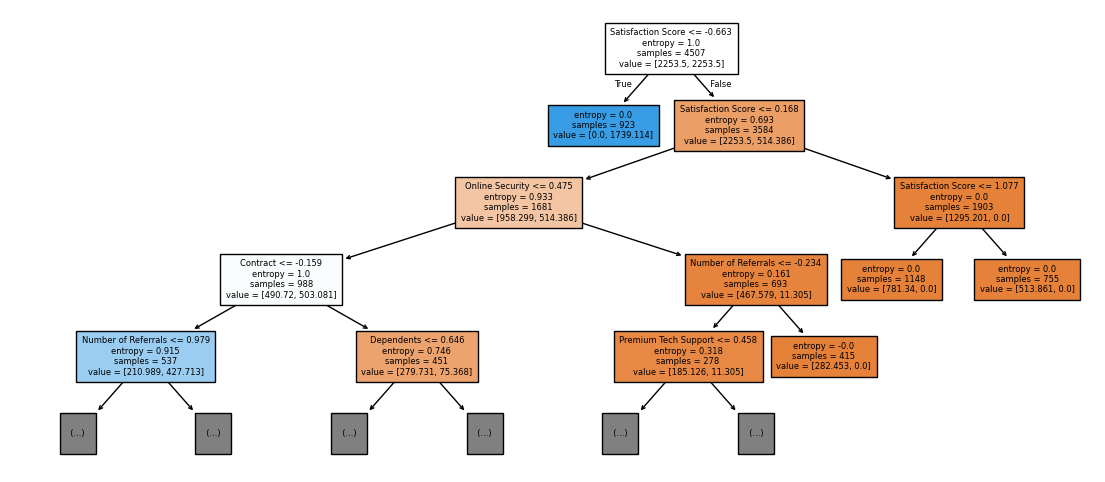

In [121]:
plt.figure(figsize=(14, 6))
plot_tree(DT, feature_names=training_data.columns, fontsize=6, max_depth=4, filled=True)
plt.show()

### 4. Random Forest

In [122]:
# build and fit model to training data
RF = RandomForestClassifier(n_estimators=20, criterion="entropy", class_weight="balanced", random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=20, random_state=42)

In [123]:
# make predicitons
ypred = RF.predict(x_val)

# view confusion matrix
confusion_matrix(y_val, ypred)

array([[813,  15],
       [ 26, 273]])

In [124]:
# ROC and F1 scores
RF_roc_score = roc_auc_score(y_val, ypred)
RF_f1_score = f1_score(y_val, ypred)

## 5. Gradient Boosting

In [125]:
# build and fit model to training data
gradient_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, random_state=42, max_depth=7)
gradient_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=20, random_state=42)

In [126]:
ypred = gradient_model.predict(x_val)
confusion_matrix(y_val, ypred)

array([[817,  11],
       [ 27, 272]])

In [127]:
# ROC and F1 scores
gb_roc_score = roc_auc_score(y_val, ypred)
gb_f1_score = f1_score(y_val, ypred)

## Display Test Results

In [128]:
scores = {"ROC_score": [knn_roc_score, LR_roc_score, DT_roc_score, RF_roc_score, gb_roc_score],
          "F1_score": [knn_f1_score, LR_f1_score, DT_f1_score, RF_f1_score, gb_f1_score]}
indices = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
pd.DataFrame(scores, index=indices)

,ROC_score,F1_score
KNN,0.892094,0.844595
Logistic Regression,0.944166,0.887519
Decision Tree,0.944909,0.891304
Random Forest,0.947464,0.930153
Gradient Boosting,0.948207,0.934708


### Gradient boosting model has the best performance based on both ROC_score and F1_score

# F. 5 fold Cross-validation on models fit to all training data

In [129]:
# models
models = {
    "KNN": knn,
    "Logistic Regression": LR,
    "Decision Tree": DT, 
    "Random Forest": RF,
    "Gradient Boosting": gradient_model
}

In [130]:
# Define scorers: f1, roc_auc, and recall
scoring = {
    'f1': 'f1',
    'roc_auc': 'roc_auc', 
    'recall': 'recall'
}

# Store results
results = {}

# Cross-validate each model
for name, model in models.items():
    cv_results = cross_validate(model, training_x, training_y, cv=5, scoring=scoring)
    results[name] = {
        'F1 Score (mean)': cv_results['test_f1'].mean(),
        'ROC AUC (mean)': cv_results['test_roc_auc'].mean(),
        'Recall (mean)': cv_results['test_recall'].mean()
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df

,F1 Score (mean),ROC AUC (mean),Recall (mean)
KNN,0.850096,0.965657,0.810033
Logistic Regression,0.892265,0.991205,0.949833
Decision Tree,0.880089,0.986565,0.946488
Random Forest,0.923937,0.985992,0.891639
Gradient Boosting,0.922599,0.991872,0.886288


- Random Forest has the highest f1-score, Gradient boosting the highest ROC-score and Logistic Regression the highest Recall.
- We'll prefer to reduce churned misclassifications so we'll go with Logistic regression. It's ROC and F1 scores are comparatively good .
- Also, Logistic regression is a simpler model compared to Random Forest and Gradient Boosting

# G. Fine Tunning Logistic Regression Model

In [131]:
# create model
regression_model = LogisticRegression(class_weight="balanced", random_state=42)

In [132]:
# define fine-tuning parameters
params = {
    "C":[0.1, 0.01, 0.001],
    "solver": ["liblinear", "lbfgs", "newton-cg"],
    "max_iter": [100, 150, 200]
}

# create stratified k-fold cross-validation object
cv = StratifiedKFold(shuffle=True, random_state=42)

# define scoring metrics: f1 and recall
scoring = {
    "f1": make_scorer(f1_score),
    "recall": make_scorer(recall_score)
}
# create grid search object. refit set to f1 score. n_jobs set to -1 to use all processors
grid_search = GridSearchCV(
    estimator=regression_model, 
    param_grid=params, 
    scoring=scoring, 
    cv=cv, refit="f1", n_jobs=-1)

grid_search.fit(training_x, training_y) # fit grid search to training data

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001], 'max_iter': [100, 150, 200],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [133]:
# save results in a dataframe, select relevant columns, and sort by rank of f1 score. Display top 5 results
results = pd.DataFrame(grid_search.cv_results_)
results_df = results[["param_C", "param_solver", "param_max_iter", "mean_test_f1", "mean_test_recall", "rank_test_f1"]]
results_df.sort_values("rank_test_f1").head()

,param_C,param_solver,param_max_iter,mean_test_f1,mean_test_recall,rank_test_f1
1,0.1,lbfgs,100,0.899515,0.948495,1
4,0.1,lbfgs,150,0.899515,0.948495,1
7,0.1,lbfgs,200,0.899515,0.948495,1
2,0.1,newton-cg,100,0.899222,0.948495,4
5,0.1,newton-cg,150,0.899222,0.948495,4


## Make Predictions on test set

In [134]:
# Select best model
best_model = grid_search.best_estimator_

# make predcitions and display scores
y_pred = best_model.predict(x_test)
print(f"Model recall: {recall_score(y_test, y_pred)}")
print(f"Model f1_score: {f1_score(y_test, y_pred)}")
print(f"Model roc_score: {roc_auc_score(y_test, y_pred)}")

Model recall: 0.946524064171123
Model f1_score: 0.8984771573604061
Model roc_score: 0.9442765248391847


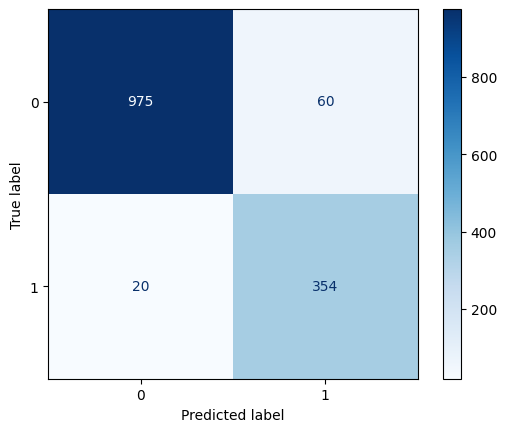

In [135]:
# display confusion matrix using confusion matrix display function
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.show()

## Most Relevant Features

In [136]:
# Get coefficients and feature names
coef = best_model.coef_[0]
features = X.columns

# Create a DataFrame of features and the absolute value of their coefficients
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': abs(coef)})
# sort dataframe in descending order based on coefficient values
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

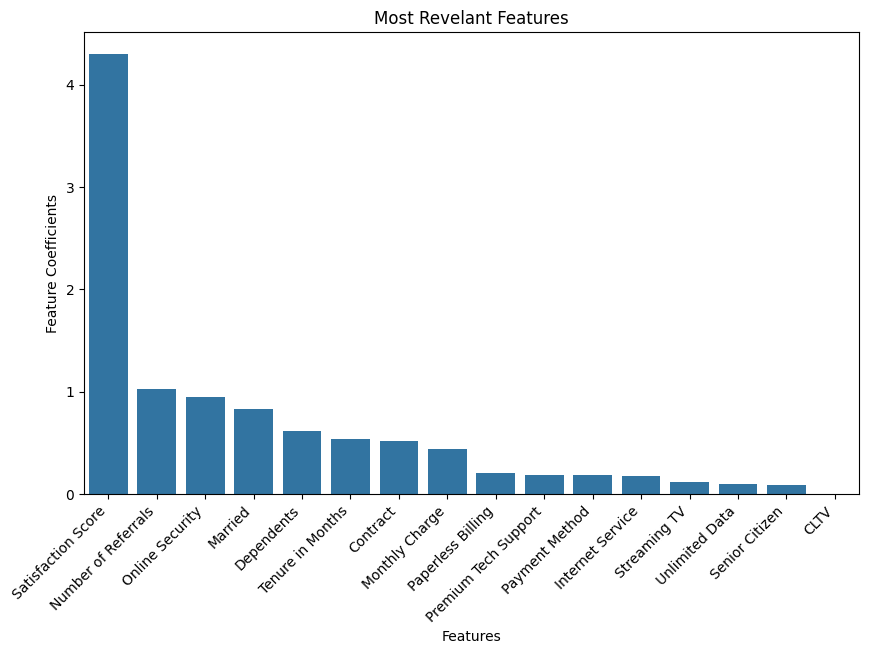

In [137]:
# plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Feature', y='Coefficient')
plt.title('Most Revelant Features')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Feature Coefficients")
plt.show()


# Phase 2
## Classify customers by churn risk

In [138]:
# get prediction probabilities
y_probabilities = LR.predict_proba(x_test)
# select probabilities for the positive class (churned customers)
churned_probs = y_probabilities[:, 1]

In [139]:
def risk_level(prob):
    """Used to assign a churn level based on the predicted probabilities"""
    if prob <= 0.3:
        return 'Low Risk'
    elif prob < 0.7:
        return 'Medium Risk'
    else:
        return 'High Risk'

# Apply to the predicted probabilities
risk_levels = [risk_level(p) for p in churned_probs]

In [140]:
# add new features to test set
X_test['Predictions'] = y_pred
X_test['Risk_Level'] = risk_levels
X_test.head()

,Dependents,Married,Senior Citizen,Satisfaction Score,CLTV,Number of Referrals,Tenure in Months,Internet Service,Online Security,Premium Tech Support,Streaming TV,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Predictions,Risk_Level
803,No,No,Yes,4,4556,0,43,Yes,No,No,Yes,Yes,Two Year,Yes,Bank Withdrawal,84.85,0,Low Risk
3549,Yes,Yes,No,4,6391,1,68,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.05,0,Low Risk
3515,No,Yes,No,4,4375,9,59,No,No,No,No,No,Two Year,No,Bank Withdrawal,18.40,0,Low Risk
5162,Yes,Yes,No,3,2828,8,29,No,No,No,No,No,Two Year,No,Credit Card,26.10,0,Low Risk
4642,Yes,Yes,No,3,6221,7,68,Yes,Yes,Yes,Yes,No,Two Year,Yes,Credit Card,85.00,0,Low Risk


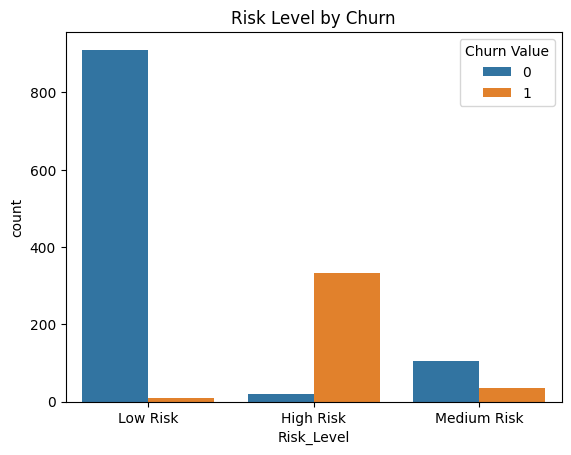

In [ ]:
# visualize risk levels by actual churn
sns.countplot(x=X_test["Risk_Level"], hue=y_test)
plt.title("Risk Level by Churn")
plt.show()

- Churn risk for customers based on the category they fall in.
- We could monitor customers grouped under a high churn risk who probably didn't churn. The data shows they have some probability to churn.

# Phase 3
## Churn Reason Analysis

In [ ]:
# select rows with churned customers
churn_data = training_data[training_data["Churn Value"] == 1]
# drop unnecessary columns and add churn category 
churn_data = churn_data.drop(columns=["Churn Value", "CLTV_Category"])
churn_data["Churn Category"] = status_df["Churn Category"]

# encode data
churn_data = encode_categorical_columns(churn_data)
print(f"Data Shape: {churn_data.shape}")
churn_data.head()

Data Shape: (1869, 17)


,Dependents,Married,Senior Citizen,Satisfaction Score,CLTV,Number of Referrals,Tenure in Months,Internet Service,Online Security,Premium Tech Support,Streaming TV,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Churn Category
0,0,0,1,3,5433,0,1,1,0,0,0,0,0,1,0,39.65,1
1,1,1,1,3,5302,1,8,1,0,0,0,1,0,1,1,80.65,1
2,1,0,1,2,3179,0,18,1,0,0,1,1,0,1,0,95.45,1
3,1,1,1,2,5337,1,25,1,0,0,1,1,0,1,0,98.50,2
4,1,1,1,2,2793,1,37,1,0,0,0,1,0,1,0,76.50,4


### Visualize Correlations

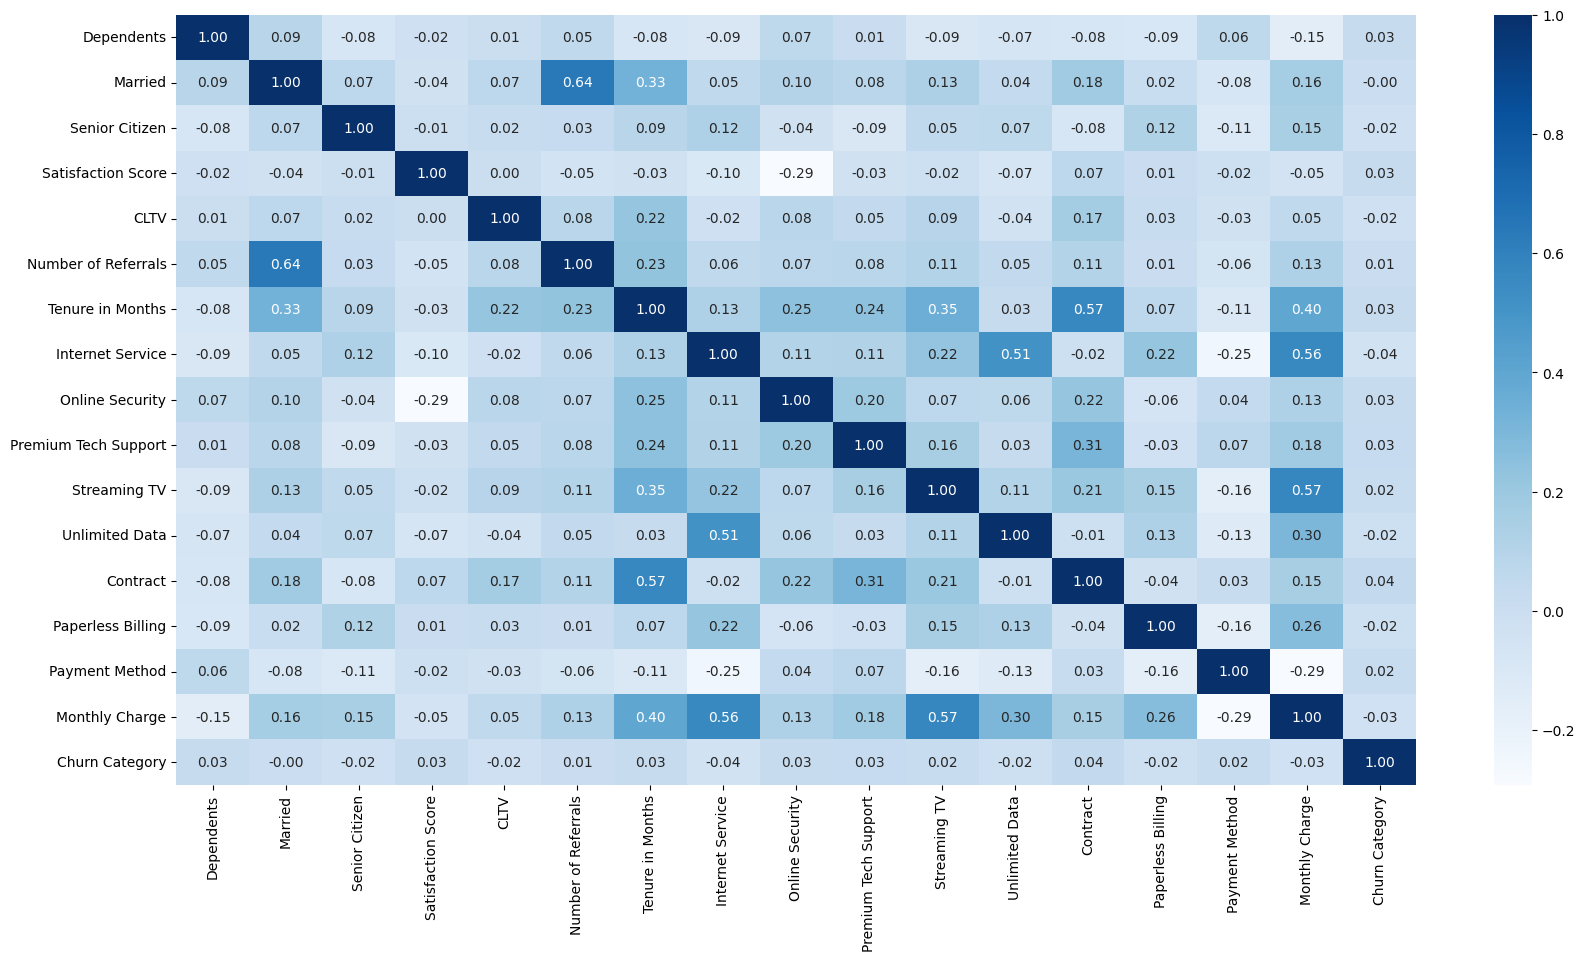

In [ ]:
#calculate correlation matrix and display heatmap using seaborn
corr = churn_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.show()

#### Correlations between features and churn category are very low. Might be hard for models to work well

## Data Preprocessing and Transformation

In [ ]:
# view target balance
churn_data["Churn Category"].value_counts(normalize=True)

Churn Category
1    0.449973
0    0.168004
2    0.162119
4    0.112895
3    0.107009
Name: proportion, dtype: float64

In [ ]:
# separate features and target variable
y = churn_data["Churn Category"]
X = churn_data.drop(columns=[ "Churn Category"])
X.shape

(1869, 16)

In [ ]:
# split data into trainig and testing sets
training_x, X_test, training_y, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# standardize data
training_x = PowerTransformer().fit_transform(training_x)
x_test = PowerTransformer().fit_transform(X_test)

# split training data into trainig and validation sets
x_train, x_val, y_train, y_val = train_test_split(training_x, training_y, test_size=0.1, stratify=training_y, random_state=42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((1345, 16), (1345,), (150, 16), (150,))

In [ ]:
# upsample the training data to balance the classes and increase training data size
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
x_train.shape, y_train.shape

((3025, 16), (3025,))

## Build and fit models

### 1. Logistic Regression Classification

In [ ]:
# build and fit model to training data
LR = LogisticRegression(class_weight="balanced", C=0.1, solver="newton-cg")
LR.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cg')

### Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, class_weight="balanced", random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=42)

### Random Forest Classifier

In [ ]:
forest_model = RandomForestClassifier(max_depth=8, criterion="entropy", class_weight="balanced", random_state=42)
forest_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=42)

### Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier( max_depth=5,criterion="squared_error", random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=5,
                           random_state=42)

In [ ]:
# save models in a dictionary for evaluation
models = {
    "Logistic Regression": LR,
    "Decision Tree": tree,
    "Random Forest": forest_model,
    "Gradient Boosting": gb_model
}

# save results in a dictionary
results = {}

# iterate through models, make predictions and score models 
for name, model in models.items():
    ypred = model.predict(x_val)
    score = model.score(x_train, y_train) # get training accuracy
    recall = recall_score(y_val, ypred, average="macro")
    f1 = f1_score(y_val, ypred, average="macro")
    results[name] = {
        "Training Accuracy": score,
        "Recall Score": recall,
        "F1 Score": f1
    }

In [ ]:
# convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
results_df

,Training Accuracy,Recall Score,F1 Score
Logistic Regression,0.370579,0.255775,0.236477
Decision Tree,0.557355,0.230755,0.225078
Random Forest,0.731901,0.282049,0.250532
Gradient Boosting,0.934876,0.251186,0.247574


- Simpler models are underfitting.
- More complex models are overfitting. 
- There's most likely not enough data.

### Attempt parameter fine-tuning on random forest classifier.

In [ ]:
forest_model = RandomForestClassifier(criterion="entropy", class_weight="balanced", random_state=42)

In [ ]:
# parameters for fine-tuning
params = {
    "n_estimators":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "max_depth": [5, 7, 10],
}

# create stratified k-fold cross-validation object
cv = StratifiedKFold(shuffle=True, random_state=42)

# define scoring metrics: f1 and recall
scoring = {
    "f1": make_scorer(f1_score, average="macro"),
    "recall": make_scorer(recall_score, average="macro")
}

# create grid search object. refit set to f1 score. n_jobs set to -1 to use all processors
grid_search = GridSearchCV(
    estimator=forest_model, 
    param_grid=params, 
    scoring=scoring, 
    cv=cv, refit="f1", n_jobs=-1, 
    return_train_score=True)

# fit grid search to training data
grid_search.fit(training_x, training_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score, response_method='predict', average=macro),
                      'recall': make_scorer(recall_score, response_method='predict', average=macro)})

In [ ]:
# get results and display relevant columns sorted by rank of f1 score. Display top 5 results
results = pd.DataFrame(grid_search.cv_results_)
results[["param_n_estimators", "mean_train_f1", "mean_test_f1", "mean_test_recall", "rank_test_f1"]].sort_values("rank_test_f1").head()

,param_n_estimators,mean_train_f1,mean_test_f1,mean_test_recall,rank_test_f1
8,90,0.469697,0.276554,0.299733,1
9,100,0.470772,0.275409,0.299386,2
0,10,0.428209,0.270255,0.289629,3
1,20,0.460293,0.269809,0.294388,4
18,90,0.669787,0.268027,0.282014,5


- Even fine-tunning parameters didn't work to make model perform better. It either over fits or under fits.
- Probably there's not enough data to identify patterns in data.